In [38]:
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve

import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling1D, MaxPooling2D, LeakyReLU
from keras.initializers import RandomNormal
import keras.optimizers as opt
from keras.callbacks import TensorBoard
from keras.utils import plot_model
from keras.regularizers import l2

In [2]:
data = np.load('../data/data.npy')
meta = np.load('../data/meta.npy')
print(f'data = {data.shape}')
print(f'meta = {meta.shape}')

data = (1845, 21, 77)
meta = (1845, 3)


In [4]:
X = data[:,:,:,np.newaxis]
Y = meta[:,2][:,np.newaxis].astype(int)

In [5]:
shape = X.shape
std = StandardScaler().fit(X.reshape(-1,1))
X = std.transform(X.reshape(-1,1)).reshape(shape)

In [6]:
X,Y = shuffle(X,Y)

In [13]:
x_train, x_test,  y_train, y_test  = train_test_split(X, Y, test_size = 0.2, random_state = 31)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.25, random_state = 31)

In [14]:
print(f"train: x={x_train.shape} y={y_train.shape}")
print(f"valid: x={x_valid.shape} y={y_valid.shape}")
print(f"test : x={x_test.shape}  y={y_test.shape}")

train: x=(1107, 21, 77, 1) y=(1107, 1)
valid: x=(369, 21, 77, 1) y=(369, 1)
test : x=(369, 21, 77, 1)  y=(369, 1)


In [15]:
cnn_input = X.shape[1:]
cnn_output = Y.shape[1]
batch_size = 32

print(f"cnn_input  = {cnn_input}")
print(f"cnn_output = {cnn_output}")
print(f"batch_size = {batch_size}")

cnn_input  = (21, 77, 1)
cnn_output = 1
batch_size = 32


In [52]:
model = Sequential()

model.add(Conv2D(16, (7,7), activation = 'tanh', name = 'conv1', input_shape = cnn_input, 
                 kernel_regularizer=l2(0.005)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), name='maxpool1'))

model.add(Conv2D(32, (5,5), activation='tanh', name='conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), name='maxpool2'))

model.add(Conv2D(64, (3,3), activation='tanh', name='conv3'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool3'))

model.add(Flatten(name='flat4'))
#model.add(Dropout(0.5, name='drop4'))
model.add(Dense(1024, activation='tanh', name='dense4'))

model.add(Dense(cnn_output, activation='sigmoid', name='softmax'))

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 15, 71, 16)        800       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 14, 70, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 66, 32)        12832     
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 9, 65, 32)         0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 63, 64)         18496     
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 3, 31, 64)         0         
_________________________________________________________________
flat4 (Flatten)              (None, 5952)              0         
__________

In [54]:
optim = opt.SGD(lr = 0.001, decay = 1e-6, momentum = 0.5, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])

In [65]:
log = model.fit(x_train, y_train, batch_size = batch_size, epochs = 100, 
          verbose = 2, validation_data=(x_valid, y_valid))

Train on 1107 samples, validate on 369 samples
Epoch 1/100
 - 0s - loss: 0.0637 - acc: 0.9946 - val_loss: 0.1938 - val_acc: 0.9377
Epoch 2/100
 - 0s - loss: 0.0619 - acc: 0.9937 - val_loss: 0.1846 - val_acc: 0.9458
Epoch 3/100
 - 0s - loss: 0.0620 - acc: 0.9946 - val_loss: 0.1976 - val_acc: 0.9431
Epoch 4/100
 - 0s - loss: 0.0620 - acc: 0.9937 - val_loss: 0.1894 - val_acc: 0.9404
Epoch 5/100
 - 0s - loss: 0.0614 - acc: 0.9919 - val_loss: 0.1859 - val_acc: 0.9404
Epoch 6/100
 - 0s - loss: 0.0619 - acc: 0.9919 - val_loss: 0.1837 - val_acc: 0.9458
Epoch 7/100
 - 0s - loss: 0.0606 - acc: 0.9946 - val_loss: 0.2038 - val_acc: 0.9431
Epoch 8/100
 - 0s - loss: 0.0602 - acc: 0.9946 - val_loss: 0.2030 - val_acc: 0.9485
Epoch 9/100
 - 0s - loss: 0.0599 - acc: 0.9937 - val_loss: 0.1927 - val_acc: 0.9458
Epoch 10/100
 - 0s - loss: 0.0593 - acc: 0.9937 - val_loss: 0.1901 - val_acc: 0.9458
Epoch 11/100
 - 0s - loss: 0.0583 - acc: 0.9964 - val_loss: 0.1910 - val_acc: 0.9431
Epoch 12/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 0.0308 - acc: 1.0000 - val_loss: 0.2169 - val_acc: 0.9485
Epoch 98/100
 - 0s - loss: 0.0311 - acc: 1.0000 - val_loss: 0.2202 - val_acc: 0.9485
Epoch 99/100
 - 0s - loss: 0.0310 - acc: 1.0000 - val_loss: 0.2167 - val_acc: 0.9485
Epoch 100/100
 - 0s - loss: 0.0305 - acc: 1.0000 - val_loss: 0.2160 - val_acc: 0.9485


In [66]:
result = model.evaluate(x_test, y_test)
print('Testing:')
print('\n'.join('{} = {}'.format(*k) for k in zip(model.metrics_names, result)))

369/369 [==============================] - 0s 68us/step
Testing:
loss = 0.2667440016095231
acc = 0.9322493229778155


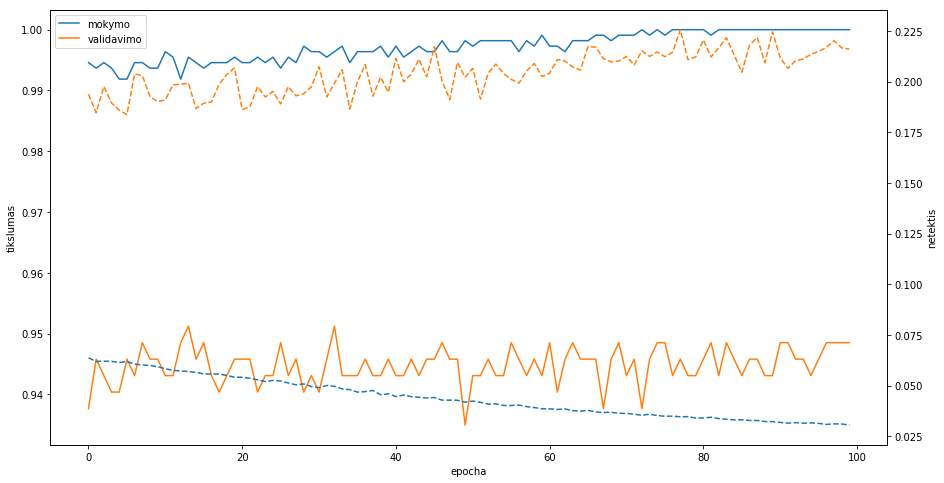

In [67]:
plt.rcParams['figure.figsize'] = (15, 8)

plt.plot(log.history['acc'], label = 'mokymo')
plt.plot(log.history['val_acc'], label = 'validavimo')
plt.ylabel('tikslumas')
plt.xlabel('epocha')
plt.legend() #['mokymo', 'testavimo'])

ax2 = plt.twinx()
ax2.plot(log.history['loss'], '--', label = 'mokymo')
ax2.plot(log.history['val_loss'], '--', label = 'validavimo')
ax2.set_ylabel('netektis')
#plt.title('model accuracy')
plt.show()

#joblib.dump(model, os.path.join(OUTPUT_FOLDER,f'nn_{h}_veg.pkl'))

In [68]:
confusion_matrix(y_test, model.predict_classes(x_test))

array([[237,  10],
       [ 15, 107]])

In [69]:
f1_score(y_test, model.predict_classes(x_test))

0.895397489539749

In [70]:
roc_auc_score(y_test, model.predict(x_test))

0.9698347381695095

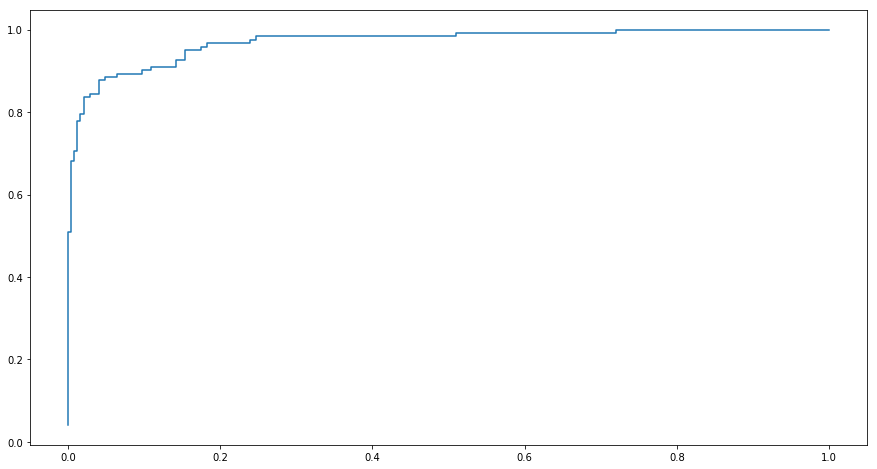

In [71]:
roc = roc_curve(y_test, model.predict(x_test))
plt.plot(roc[0],roc[1])
plt.show()

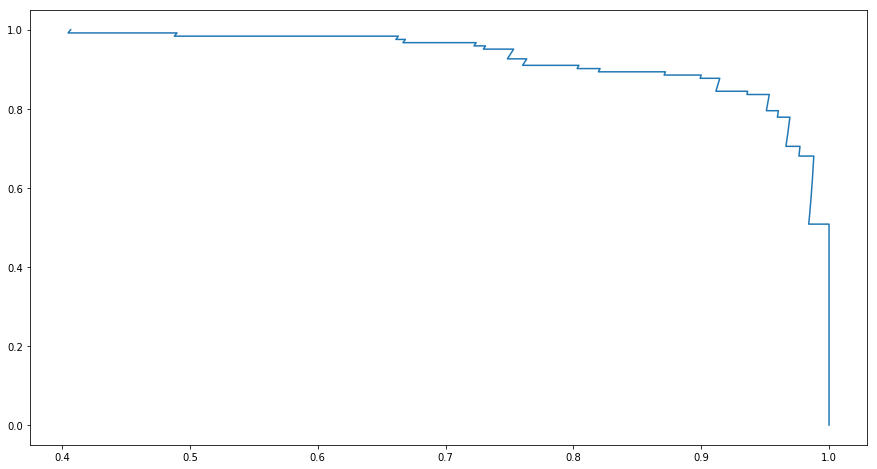

In [72]:
prc = precision_recall_curve(y_test, model.predict(x_test))
plt.plot(prc[0],prc[1])
plt.show()